# Proxyflow demo

### First computations

This is a demo of the project, with Dataset 2 of the paper. 

In [1]:
### IMPORTS
import sys
sys.path.append('..')
from classes.graph_simulation import SimWithoutFault
import matplotlib.pyplot as plt
import numpy as np

Parameters to be chosen. Each of them are optional (The data are already included in the repo):
- generate_MG_realisations : Generates 50 MG realisations for the simulation. Dependancies : gstools
- compute_modflow : Runs Modflow simulation. Dependancies : flopy
- build_graph : Generates graph from the model. Dependancies : igraph, Loopflow

In [2]:
### PARAMETERS
generate_MG_realisations = False 
compute_modflow = False
build_graph = False

In [3]:
sim = SimWithoutFault(data_path='/home/00113660/Documents/proxyflow/data/random_sim') #class of computation
sim.generate_sim_data()
scenario = sim.instantiate_scenario(0) # a scenario is instantiated by its id (depending on the data) 
if generate_MG_realisations:
    sim.generate_MGS(scenario)
sim.generate_K_field(scenario)
if compute_modflow:
    sim.run_MODFLOW(scenario)

In [4]:
# loading different data
sim.load_hydro_data(scenario)
sim.load_graph(scenario)
sim.get_mass_data(scenario)

2024-06-21 11:56:56.707669 - LOADING K FIELD
2024-06-21 11:56:56.708220 - LOADING MODFLOW RESULTS
2024-06-21 11:56:56.757503 - LOADING GRAPH


True

In [5]:
### visualising MODFLOW plume
# sim.plot_plume_3D(scenario, visu = 'notebook')

In [6]:
### Building graph 
if build_graph:
    sim.build_graph(scenario)
sim.load_graph(scenario)

In [7]:
### Computing Dijkstra

distances = sim.compute_dijkstra(scenario)

2024-06-21 11:56:58.767034 - COMPUTING DIJKSTRA WITH IGRAPH
2024-06-21 11:56:59.221151 - DIJKSTRA COMPUTED


Distance distribution is stored in scenario.ig_map. Modflow cumulative mass is in scenario.mf_map.

Text(0.5, 0, 'y')

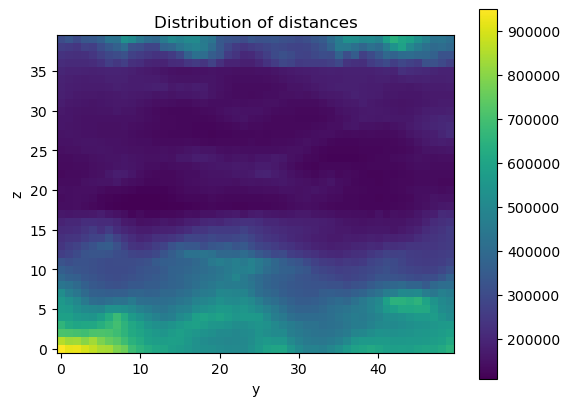

In [8]:
plt.imshow(scenario.ig_map, origin='lower')
plt.colorbar()
plt.title('Distribution of distances')
plt.ylabel('z')
plt.xlabel('y')

Text(0.5, 0, 'y')

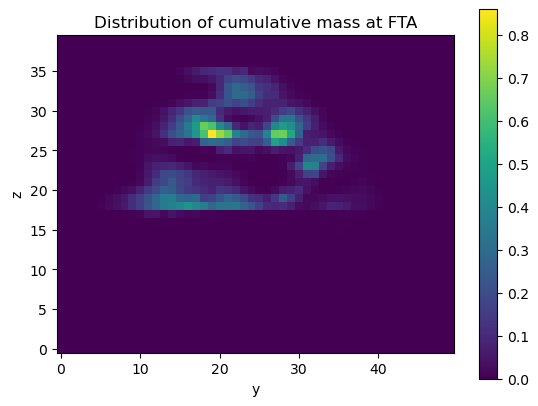

In [9]:
plt.imshow(scenario.mf_map, origin='lower')
plt.colorbar()
plt.title('Distribution of cumulative mass at FTA')
plt.ylabel('z')
plt.xlabel('y')

Correlation coefficients between two distributions.

In [10]:
pearson, spearman = sim.compute_Pearson(scenario), sim.compute_Spearman(scenario)
print(f'Pearson coefficient is {pearson}, Spearman coefficient is {spearman}')

Pearson coefficient is 0.293833435417422, Spearman coefficient is 0.9280716955179239


Similarity index is computed:

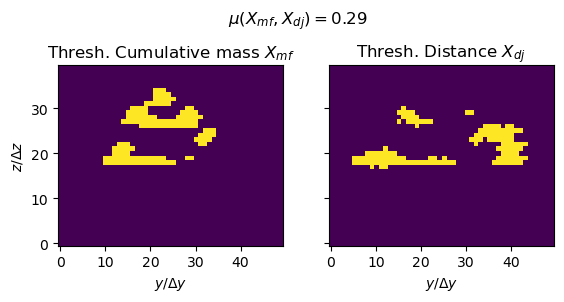

In [11]:
sim.compute_similarity(scenario,plot = True)

An idea of the possible auto-thresholding of the distances

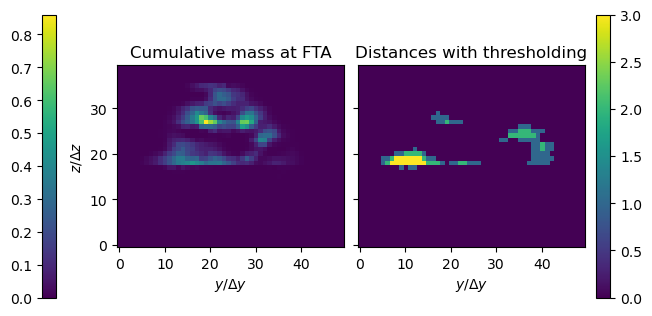

In [12]:
_ = sim.compute_auto_thresh(scenario, plot = True)

Finally, GraphSim.computes_data_dict provides some useful data about the simulation


In [15]:
sim.main(scenario, compute_data_dict  = True)

2024-06-21 12:03:00.517572 - LOADING K FIELD
2024-06-21 12:03:00.518447 - LOADING MODFLOW RESULTS
2024-06-21 12:03:00.578235 - COMPUTING DIJKSTRA WITH IGRAPH
2024-06-21 12:03:00.866921 - DIJKSTRA COMPUTED


{'id': 0,
 'success': True,
 'conc_max': 0.860075291934133,
 'min_distance': 109399.61397307088,
 't_sim': 518.0833333333335,
 'ctm_x': 1050.0,
 'ctm_y': 2550.0,
 'com_distance': 354.2087627217837,
 'var': 231077.5493712361,
 'jaccard_sim': 0.26666666666666666,
 'wass': 443.8912858845175,
 'NWD': 0.32040073034259015,
 'similarity': 0.2935336985046284,
 'Spearman': 0.9280716955179239,
 'Pearson': 0.293833435417422,
 'sum_mass': 52.88312719649438,
 'sum_dist': 547020114.7427081}

Method GraphSim.main makes it possible to call several methods at once. Here's an example :

In [13]:
sim.main(scenario, compute_similarity = True)

2024-06-21 11:57:00.988870 - LOADING K FIELD
2024-06-21 11:57:00.989523 - LOADING MODFLOW RESULTS
2024-06-21 11:57:01.049015 - COMPUTING DIJKSTRA WITH IGRAPH
2024-06-21 11:57:01.312968 - DIJKSTRA COMPUTED
2024-06-21 11:57:01.313002 - END


It is possible to call this function in parallel with the method GraphSim.parallel_computation, giving exactly the same arguments

In [20]:
list_scenario_ids = [0,1,2]
sim.scenarios = {}
result = sim.parallel_computation(list_scenario_ids, compute_data_dict = True)
print(result)

2024-06-21 12:05:42.348465 - LOADING K FIELD
2024-06-21 12:05:42.351076 - LOADING MODFLOW RESULTS
2024-06-21 12:05:42.357251 - LOADING K FIELD
2024-06-21 12:05:42.359794 - LOADING MODFLOW RESULTS
2024-06-21 12:05:42.365807 - LOADING K FIELD
2024-06-21 12:05:42.368709 - LOADING MODFLOW RESULTS
2024-06-21 12:05:42.412071 - BUILDING GRAPH
2024-06-21 12:05:42.413576 BUILDING GRAPH
Running topological_analysis version 0.1.19
2024-06-21 12:05:42.417408 - BUILDING GRAPH
2024-06-21 12:05:42.418213 BUILDING GRAPH
Running topological_analysis version 0.1.19
2024-06-21 12:05:42.425202 - BUILDING GRAPH
2024-06-21 12:05:42.426101 BUILDING GRAPH
Running topological_analysis version 0.1.19
2024-06-21 12:06:00.684897 GRAPH BUILT
2024-06-21 12:06:00.686603 - COMPUTING DIJKSTRA WITH IGRAPH
2024-06-21 12:06:00.712180 GRAPH BUILT
2024-06-21 12:06:00.713911 - COMPUTING DIJKSTRA WITH IGRAPH
2024-06-21 12:06:00.840393 GRAPH BUILT
2024-06-21 12:06:00.841923 - COMPUTING DIJKSTRA WITH IGRAPH
2024-06-21 12:06:01